# DECISION TREE

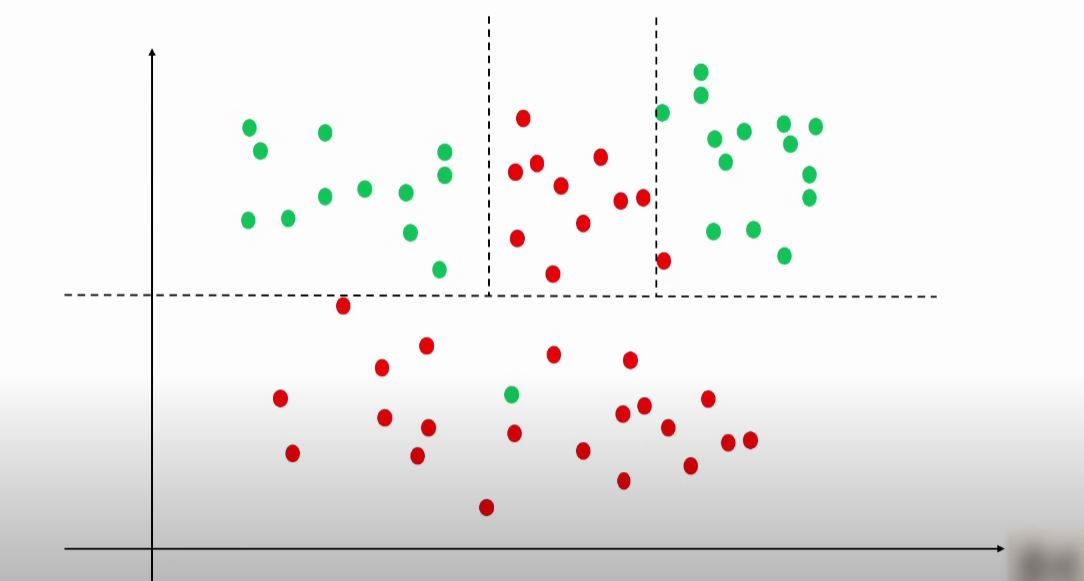

## Pure Subset(Low Entropy) vs Impure Subset(High Entropy)   
### Entropy - Measure of Randomness

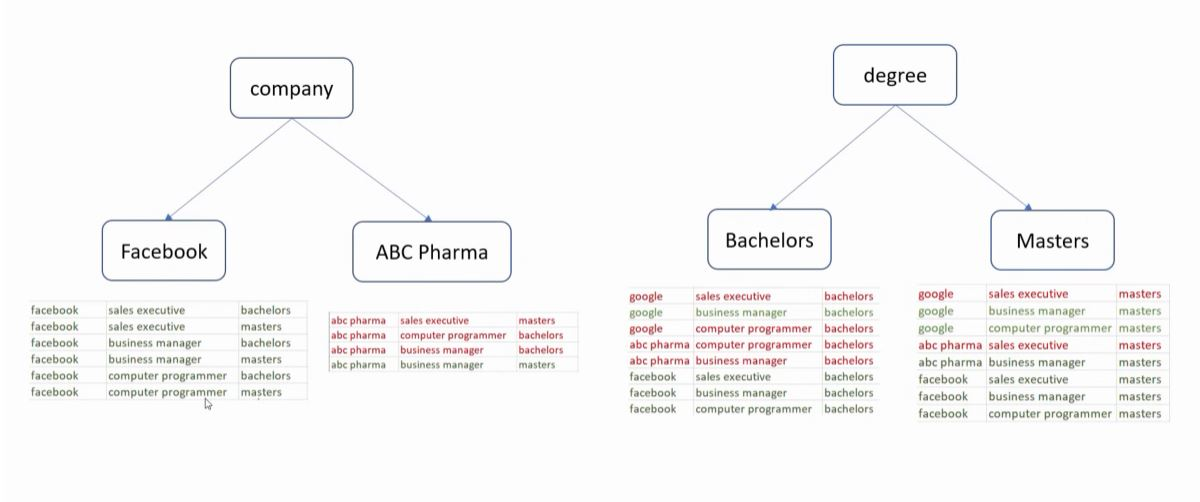

- So if we use company, we have high information gain
- compared to degree with low information gain

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./salaries.csv')

In [3]:
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [4]:
inputs = df.drop('salary_more_then_100k', axis='columns')
target = df['salary_more_then_100k']

In [5]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

### As ML model can only understand numbers we need to convert the label to numbers

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [8]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

In [9]:
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [10]:
inputs_n = inputs.drop(['company','job','degree'],axis='columns')

In [11]:
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


- google : 2
- abc pharma : 0
- facebook : 1

In [12]:
from sklearn import tree   #For decision tree we import tree

In [13]:
model = tree.DecisionTreeClassifier()

In [14]:
from sklearn.model_selection import train_test_split

In [25]:
X_train , X_test, y_train, y_test = train_test_split(inputs_n,target,test_size=0.2,random_state=10)

In [26]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
model.predict(X_test)

array([0, 1, 1, 0], dtype=int64)

In [28]:
model.score(X_test,y_test)

0.75

In [29]:
model.predict([[2,2,1]])

D:\New folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)